# 2.2.2 Machine Learning section.

>In this section, we will be using a less restrictive text pre-processing:

>* Stop words.

>We will be using sklearn NaiveBayes Multinomial.

>We will proceed like we did with labels `relevance` but with `positivity`.

>We only have 1,420 datapoints, so we will drop the missing values (inputting to the mean introduces bias, as we described before).

>`positivity` ranges from `2` to `9`, so we will create two classes: one class grouping from `2` to `5`, and the other one grouping `6` to `9`, which is totally arbitrarely.

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import nltk
import nlp_ml_functions
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer, binarize, FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
sns.set_style('white')

## Using `positivity` as labels.

### Loading dataset into a pandas dataframe.

In [3]:
economic_pos_df = pd.read_pickle("positive_df")

## 1- Creating models.

In [4]:
X_headline = economic_pos_df['article_headline']
y_headline = economic_pos_df['positivity']

In [5]:
X_train_headline, X_test_headline, y_train_headline, y_test_headline = train_test_split(X_headline, y_headline, test_size=0.3, random_state=42)

In [6]:
X_article = economic_pos_df['article_text']
y_article = economic_pos_df['positivity']

In [7]:
X_train_article, X_test_article, y_train_article, y_test_article = train_test_split(X_article, y_article, test_size=0.3, random_state=42)

### 1.1 - Applying CountVectorizer.

We will apply to `article_headline` and `article_text`.

In [8]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text_stop)),('classifier', MultinomialNB())])

In [9]:
pipeline.fit(X_train_headline, y_train_headline)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text_stop at 0x1147cec80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pre...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [10]:
predictions = pipeline.predict(X_test_headline)

In [11]:
predictions_probability = pipeline.predict_proba(X_test_headline)

#### Model evaluation using headlines.

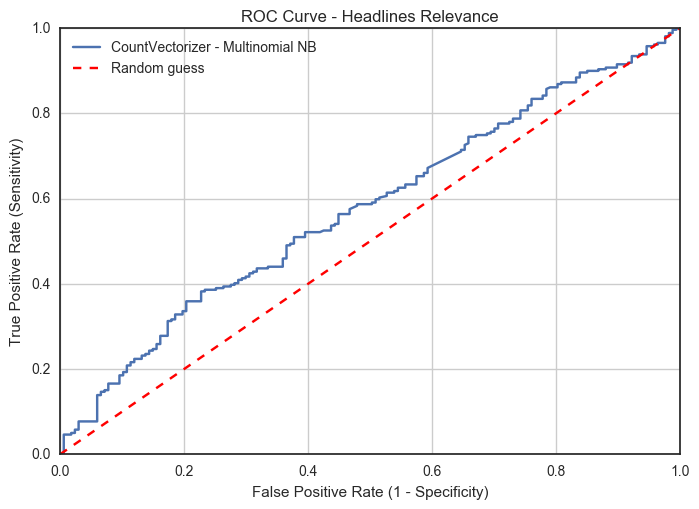

In [12]:
nlp_ml_functions.plot_roc(y_test_headline, predictions_probability[:,1], "CountVectorizer - Multinomial NB", "Headlines Relevance")

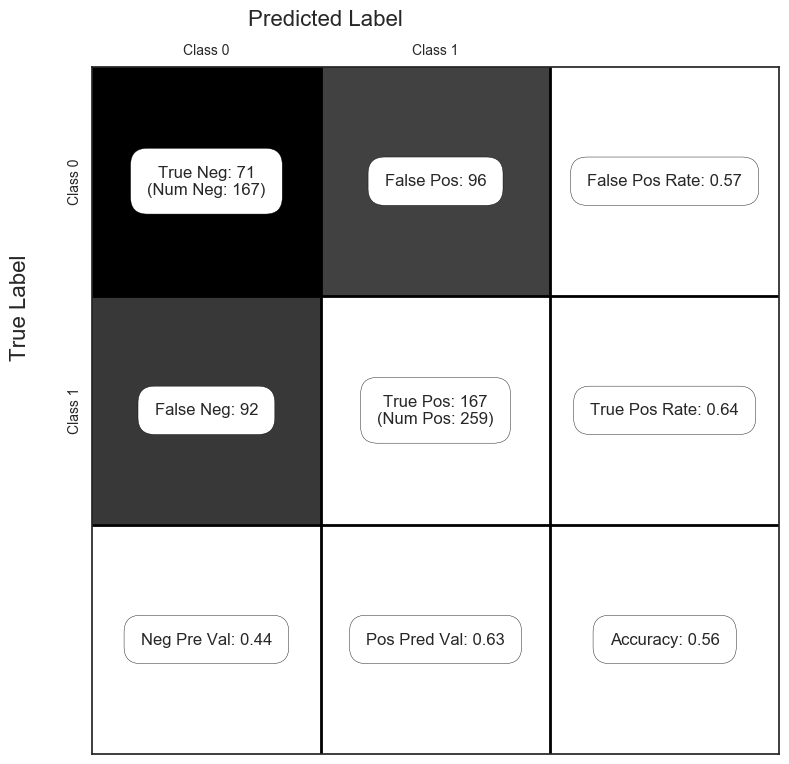

In [13]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_headline, predictions), ['Class 0', 'Class 1'])

In [14]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_headline, predictions)

Precision Score of Multinomial NB model: 63.50%

AUC: 53.50%

Accuracy Score of Multinomial NB model: 55.87%

Recall Score of Multinomial NB model: 64.48%

F1 Score of Multinomial NB model: 63.98%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.44      0.43      0.43       167
          1       0.63      0.64      0.64       259

avg / total       0.56      0.56      0.56       426



In [15]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text_stop at 0x1147cec80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pre...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [16]:
predictions = pipeline.predict(X_test_article)

In [17]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation using article.

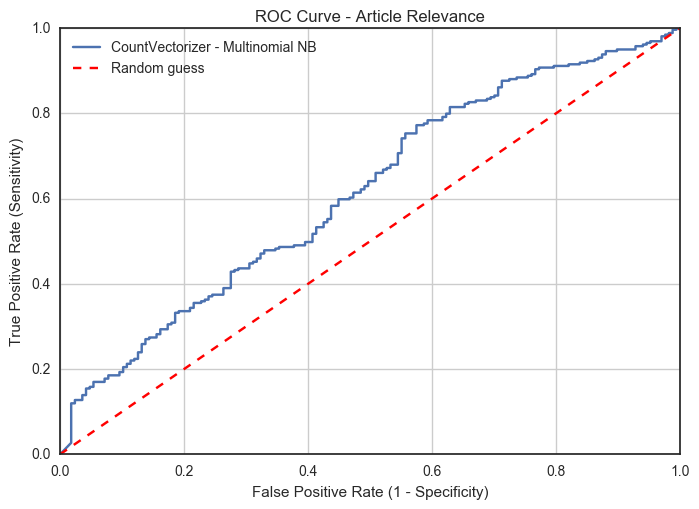

In [18]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - Multinomial NB", "Article Relevance")

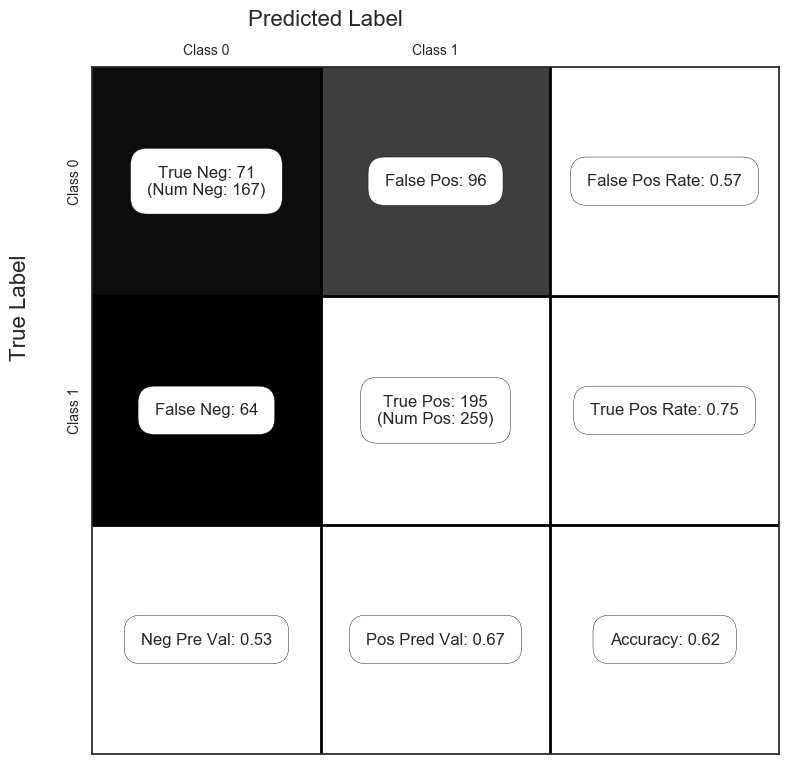

In [19]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [20]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_article, predictions)

Precision Score of Multinomial NB model: 67.01%

AUC: 58.90%

Accuracy Score of Multinomial NB model: 62.44%

Recall Score of Multinomial NB model: 75.29%

F1 Score of Multinomial NB model: 70.91%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.53      0.43      0.47       167
          1       0.67      0.75      0.71       259

avg / total       0.61      0.62      0.62       426



### 1.2 - Applying TfidfVectorizer.

In [21]:
pipeline = Pipeline([('bow', TfidfVectorizer(analyzer=nlp_ml_functions.process_dataframe_text_stop)),('classifier', MultinomialNB())])

In [22]:
pipeline.fit(X_train_headline, y_train_headline)

Pipeline(steps=[('bow', TfidfVectorizer(analyzer=<function process_dataframe_text_stop at 0x1147cec80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), nor...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [23]:
predictions = pipeline.predict(X_test_headline)

In [24]:
predictions_probability = pipeline.predict_proba(X_test_headline)

#### Model evaluation using headlines.

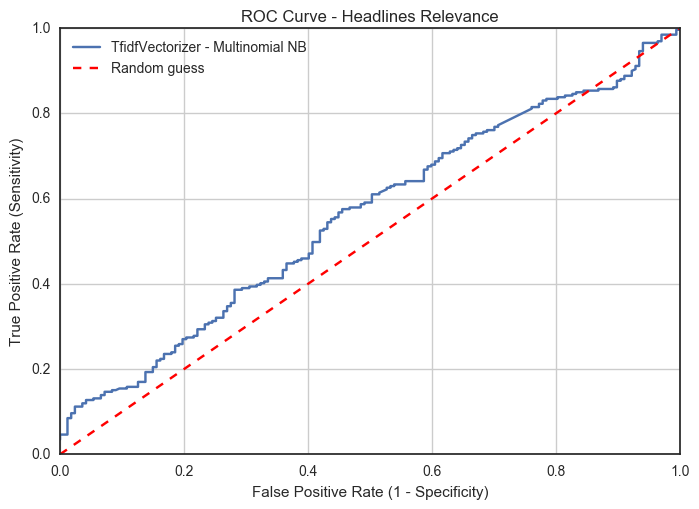

In [25]:
nlp_ml_functions.plot_roc(y_test_headline, predictions_probability[:,1], "TfidfVectorizer - Multinomial NB", "Headlines Relevance")

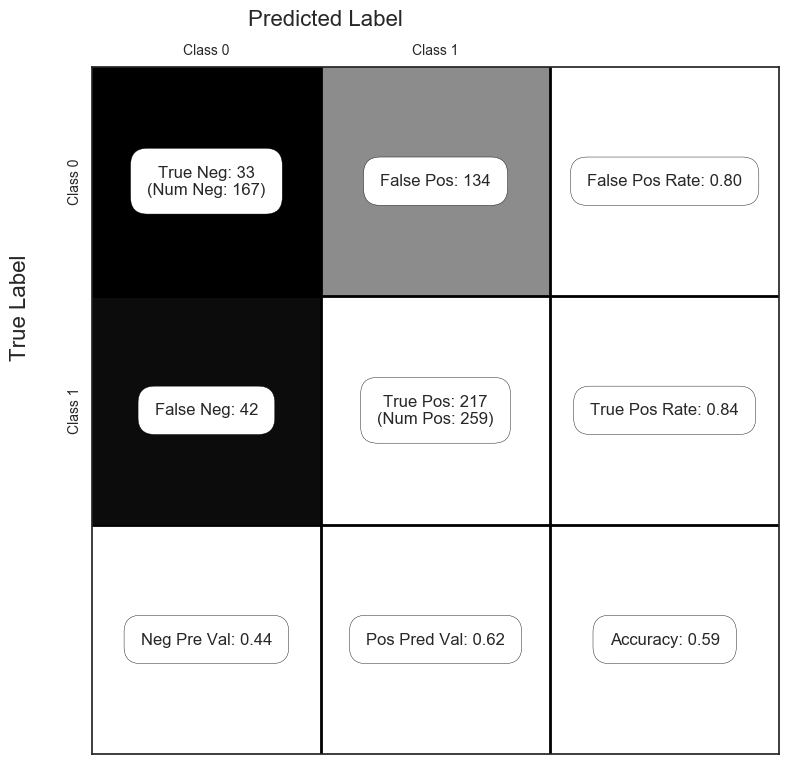

In [26]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_headline, predictions), ['Class 0', 'Class 1'])

In [27]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_headline, predictions)

Precision Score of Multinomial NB model: 61.82%

AUC: 51.77%

Accuracy Score of Multinomial NB model: 58.69%

Recall Score of Multinomial NB model: 83.78%

F1 Score of Multinomial NB model: 71.15%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.44      0.20      0.27       167
          1       0.62      0.84      0.71       259

avg / total       0.55      0.59      0.54       426



In [28]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', TfidfVectorizer(analyzer=<function process_dataframe_text_stop at 0x1147cec80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), nor...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [29]:
predictions = pipeline.predict(X_test_article)

In [30]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation using article.

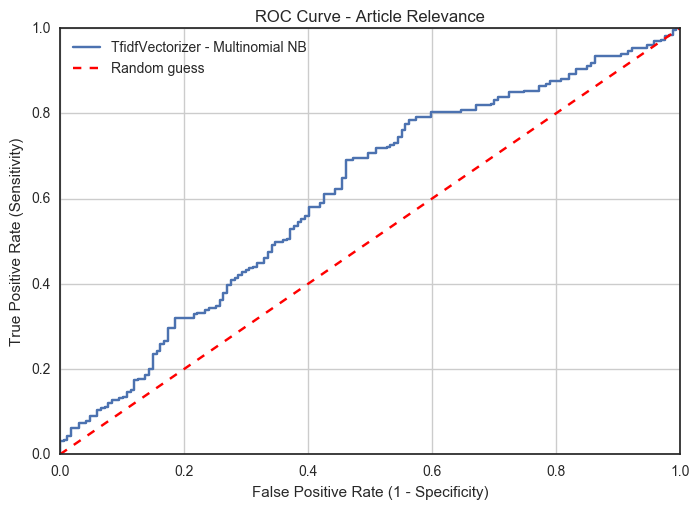

In [31]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "TfidfVectorizer - Multinomial NB", "Article Relevance")

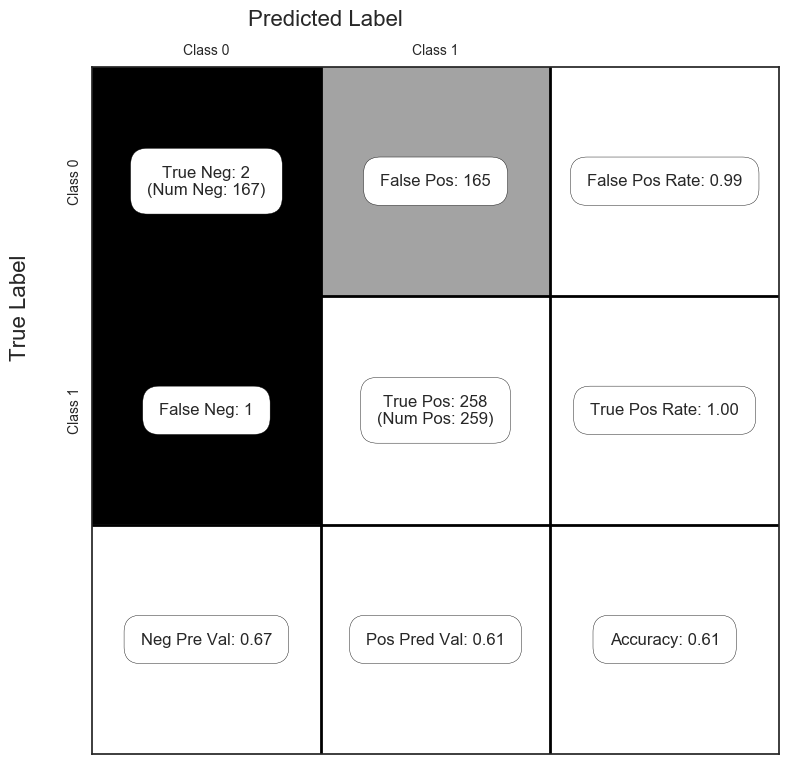

In [32]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [33]:
nlp_ml_functions.classification_metrics("Multinomial NB", y_test_article, predictions)

Precision Score of Multinomial NB model: 60.99%

AUC: 50.41%

Accuracy Score of Multinomial NB model: 61.03%

Recall Score of Multinomial NB model: 99.61%

F1 Score of Multinomial NB model: 75.66%

Classification Report of Multinomial NB:

              precision    recall  f1-score   support

          0       0.67      0.01      0.02       167
          1       0.61      1.00      0.76       259

avg / total       0.63      0.61      0.47       426



### We have learned that is best to use t articles is better than headlines (as they have less features) and that CountVectorizer has better metrics than TfidfVectorizer.